In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\climate data\GlobalTemperatures.csv")
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [3]:
# NaN dəyərləri orta qiymətlə doldurmaq
df['LandMaxTemperature'] = df['LandMaxTemperature'].fillna(df['LandMaxTemperature'].mean())
df['LandMinTemperature'] = df['LandMinTemperature'].fillna(df['LandMinTemperature'].mean())

#tarix sutunu datetime cevirme
df['dt'] = pd.to_datetime(df['dt'])

#sutun adlarinda bosluqlari silme
df.columns = df.columns.str.strip()

#lazimsiz sutunlari silme
df.drop(columns=['LandAndOceanAverageTemperatureUncertainty'], inplace=True, errors='ignore')
df.drop(columns=['LandAverageTemperatureUncertainty'], inplace=True, errors='ignore')
df.drop(columns=['LandMaxTemperatureUncertainty'], inplace=True, errors='ignore')
df.drop(columns=['LandMinTemperatureUncertainty'], inplace=True, errors='ignore')
df.drop(columns=['LandAndOceanAverageTemperature'], inplace=True, errors='ignore')
df.drop(columns=['LandAndOceanAverageTemperatureUncertainty'], inplace=True, errors='ignore')


df.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature
0,1750-01-01,3.034,14.350601,2.743595
1,1750-02-01,3.083,14.350601,2.743595
2,1750-03-01,5.626,14.350601,2.743595
3,1750-04-01,8.490,14.350601,2.743595
4,1750-05-01,11.573,14.350601,2.743595


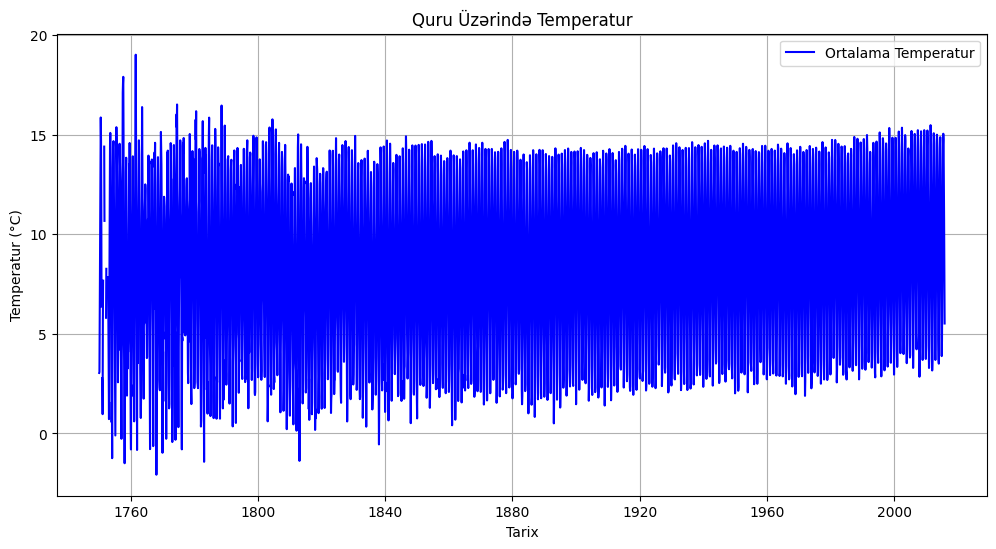

In [4]:
#gunluk temperatur 1750-2015
plt.figure(figsize=(12, 6))
plt.plot(df['dt'], df['LandAverageTemperature'], label='Ortalama Temperatur', color='blue')
plt.title('Quru Üzərində Temperatur')
plt.xlabel('Tarix')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.grid(True)
plt.show()

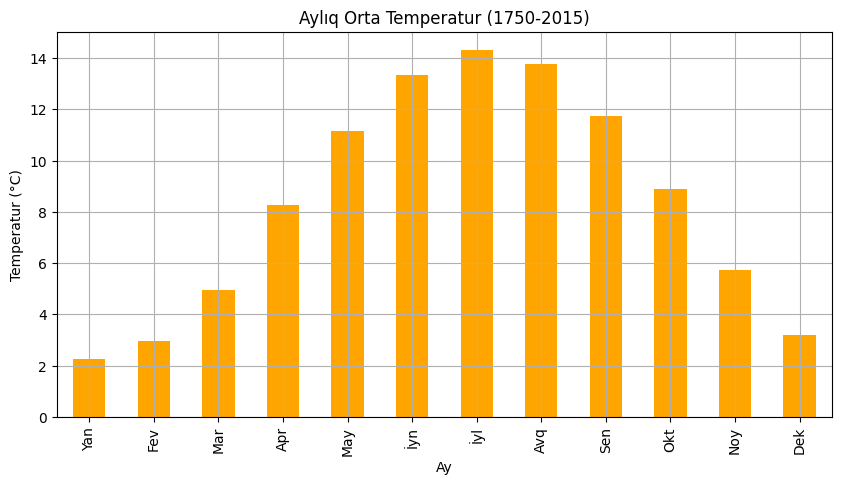

In [5]:
#orta ayliq temperatur 1750-2015
df['Month'] = df['dt'].dt.month 
ayliq_orta = df.groupby('Month')['LandAverageTemperature'].mean()

plt.figure(figsize=(10, 5))
ayliq_orta.plot(kind='bar', color='orange')
plt.title('Aylıq Orta Temperatur (1750-2015)')
plt.xlabel('Ay')
plt.ylabel('Temperatur (°C)')
plt.xticks(range(12), ['Yan', 'Fev', 'Mar', 'Apr', 'May', 'İyn', 'İyl', 'Avq', 'Sen', 'Okt', 'Noy', 'Dek'])
plt.grid(True)
plt.show()

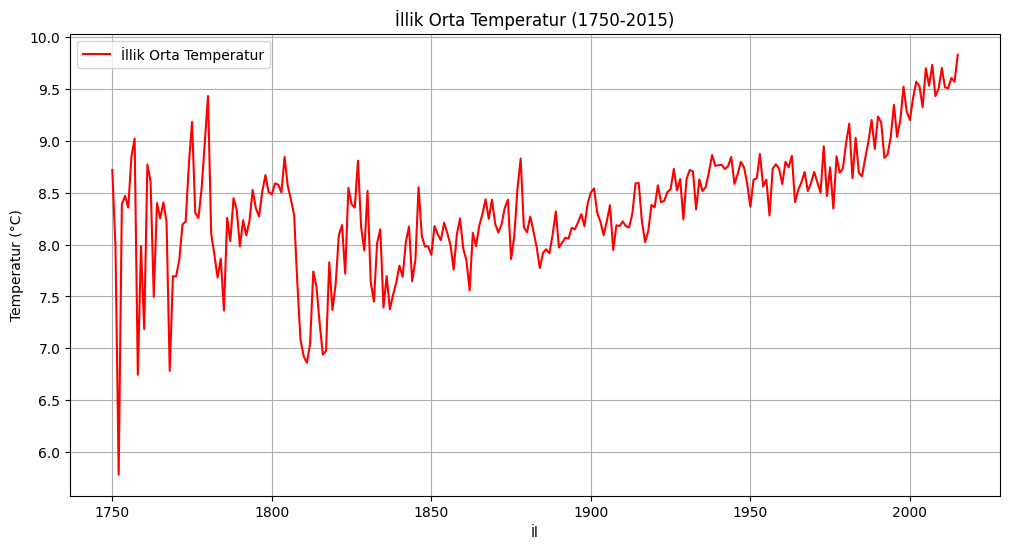

In [6]:
#il sutunu , ortalama
df['Year'] = df['dt'].dt.year
illik_orta = df.groupby('Year')['LandAverageTemperature'].mean()

plt.figure(figsize=(12, 6))
plt.plot(illik_orta.index, illik_orta.values, label='İllik Orta Temperatur', color='red')
plt.title('İllik Orta Temperatur (1750-2015)')
plt.xlabel('İl')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.grid(True)
plt.show()

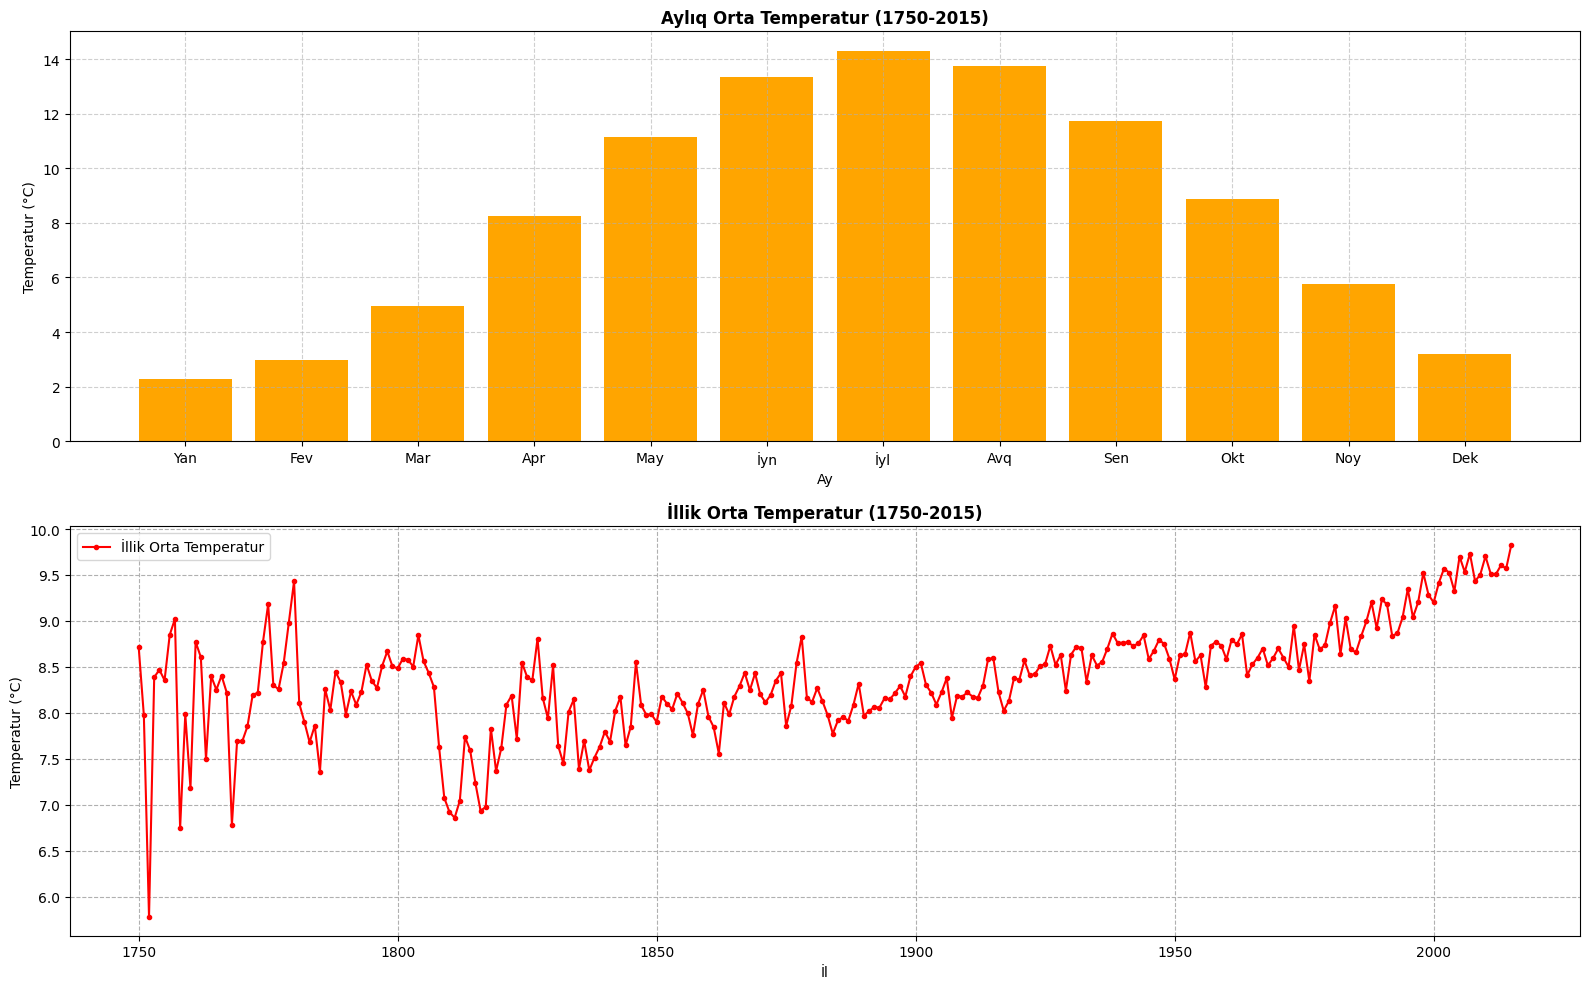

In [7]:
df['dt'] = pd.to_datetime(df['dt'])

#ayliq orta temperatur
df['Month'] = df['dt'].dt.month
ayliq_orta = df.groupby('Month')['LandAverageTemperature'].mean()

#illik orta temperaturlar
df['Year'] = df['dt'].dt.year
illik_orta = df.groupby('Year')['LandAverageTemperature'].mean()

#subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

#ayliq orta temperatur chart
ax1.bar(ayliq_orta.index, ayliq_orta.values, color='orange')
ax1.set_title('Aylıq Orta Temperatur (1750-2015)', fontweight='bold')
ax1.set_xlabel('Ay')
ax1.set_ylabel('Temperatur (°C)')
ax1.set_xticks(range(1, 13))  # 1-dən 12-yə qədər aylar
ax1.set_xticklabels(['Yan', 'Fev', 'Mar', 'Apr', 'May', 'İyn', 'İyl', 'Avq', 'Sen', 'Okt', 'Noy', 'Dek'])
ax1.grid(True, linestyle='--', alpha=0.6)

#illik orta temperatur chart
ax2.plot(illik_orta.index, illik_orta.values, label='İllik Orta Temperatur', color='red', marker='o', markersize=3)
ax2.set_title('İllik Orta Temperatur (1750-2015)', fontsize=12, fontweight='bold')
ax2.set_xlabel('İl', fontsize=10)
ax2.set_ylabel('Temperatur (°C)')
ax2.legend()
ax2.grid(True, linestyle='--')

#qrafikler arasindaki bosluqlarin temizlenmesi 
plt.tight_layout()
plt.show()
